DEFINICIÓN DE FUNCIONES E IMPORTACIÓN DE LIBRERÍAS

In [1]:
import networkx as nx
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

# Función de construcción de objetos tipo grafo
def __build_graph(df, node_columns, directed=True, weigths=False):
    
    if directed is True:
        G = nx.DiGraph()
    else:
        G = nx.Graph()

    nodes = np.unique(df[node_columns].values)
    for node in nodes:
        G.add_node(node)

    edges = [tuple(f) for f in df[node_columns].values]
    edges_tuples, freq = np.unique(edges, axis=0, return_counts=True)

    if weigths is True:
        edges_weights = [tuple(list(edges_tuples[f]) + [freq[f]]) for f in range(len(edges_tuples))]
        G.add_weighted_edges_from(edges_weights)
        string = nx.info(G)
        init_pos = string.find("Average degree") + len("Average degree") + 4
        end_pos = init_pos + 6
        string = string.replace(string[init_pos:end_pos], str(np.round(np.mean(list(dict(G.degree(weight="weight")).values())),4)))
    else:
        G.add_edges_from(edges_tuples)
        string = nx.info(G)
    
    print(string)
    
    return G


# Función para muestra de gráficos mediante NetworkX
def __plot_graph(G, layout="spring", label=True, threshold=0):
    
    fig = plt.figure(figsize=(17,14))
    fig.patch.set_facecolor('k') 
    fig.patch.set_alpha(0.15)

    if layout == "spring":
        pos=nx.layout.spring_layout(G)
    else:
        print("Only spring layout implemented.")
        return False
    node_sizes = np.minimum(np.array(list(dict(G.degree(G.nodes())).values()))*25, 1000)

    if not nx.get_edge_attributes(G,"weight"):
        edge_colors = np.ones(len(G.edges)).astype(int)
        weight = None
    else:
        edge_colors = np.minimum(np.array(list(nx.get_edge_attributes(G,'weight').values())), 100)
        weight = "weight"
        
    if label is True:
        node_list = G.nodes
        G_node_dict = {}
        degree_dict = dict(G.degree(weight=weight))
        for rep_node in [f[0] for f in G.edges if f[0] == f[1]]: # Estos suman grado 2 a ese nodo
            freq = 1
            if weight == "weight":
                freq = nx.get_edge_attributes(G, "weight")[(rep_node, rep_node)]
            degree_dict[rep_node] -= 2*freq - 1
        for nod in node_list:
            if degree_dict[nod] >= threshold:
                G_node_dict[nod] = nod  
            else:
                G_node_dict[nod] = ""
            
    else:
        G_node_dict = None
        
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="blue", label=G_node_dict, alpha=0.5)
    if label is True:
        nx.draw_networkx_labels(G, pos, labels=G_node_dict, font_size=11, font_color='k', font_weight="bold")

    edges = nx.draw_networkx_edges(
        G,
        pos,
        node_size=node_sizes,
        arrowstyle="->" if G.is_directed() else "-",
        arrowsize=20,
        edge_color=edge_colors,
        edge_cmap=plt.cm.Blues,
        width=2,
        edge_vmin=0,edge_vmax=100 
    )

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()

FILTRADOS PARA S2 GRUPO

In [2]:
users_df = pd.read_json('data/users.json')
users_clean_df = users_df.drop(columns=['_id', 'name', 'protected'])
description_list = ['S2 Grupo', 's2grupo', 'securityartwork', 'Lab52', 'lab52']
user_list = ['mjuan', 'antoniosanzalc', 'rarosell', 'nomed__1']
s2_users = []
s2_df = pd.DataFrame()

#Se pasa el id para obtener lista y construir grafo con relaciones, si no sale vacio
for i in description_list:
    tmp_df = users_clean_df[users_clean_df['description'].str.contains(i)]
    s2_df = s2_df.append(tmp_df, ignore_index=True)
    tmp_list = tmp_df['id'].to_list()
    s2_users = s2_users + tmp_list

for j in user_list:
    tmp_df = users_clean_df[users_clean_df['username'].isin(user_list)]
    s2_df = s2_df.append(tmp_df, ignore_index=True)
    tmp_list = tmp_df['id'].to_list()
    s2_users = s2_users + tmp_list

unique_s2_users = set(s2_users)
s2_final_df  = s2_df.drop_duplicates(keep='first')

In [2]:
#filtrado de ciberseguridad
users_df = pd.read_json('data/users.json')
users_clean_df = users_df.drop(columns=['_id', 'name', 'protected'])
description_list = ['CyberSecurity', 'Cybersecurity', 'cybersecurity',
'Red Team', 'Ciberseguridad', 'DFIR', 'Security',
'Hacker', 'Pentester', 'CSIRT', 'CERT', 'Malware',
'Seguridad', 'Blue Team', 'OWASP', 'Forensics', 'Cybercrime',
'Threat Intelligence','CISA', 'CyberSeguridad', 'security', 'malware',
'hacker', 'hacking', 'pentester', 'seguridad', 'ciberseguridad', 'cyber',
'cybercrime','OSINT', 'infosec', 'cyberlawyer']
cybersec_users = []

for i in description_list:
    tmp_df = users_clean_df[users_clean_df['description'].str.contains(i)]
    tmp_list = tmp_df['id'].to_list()
    cybersec_users = cybersec_users + tmp_list

FILTRADOS PARA INDRA

In [6]:
users_indra_df = pd.read_json('data/data_indra/users.json')
users_indra_clean_df = users_indra_df.drop(columns=['_id', 'name', 'protected'])
description_list = ['IndraCompany', 'indracompany', 'indraempleo', 'minsaitbyindra', 'IndraenColombia', 'indraencolombia']
indra_users = []
indra_df = pd.DataFrame()

#Se pasa el id para obtener lista y construir grafo con relaciones, si no sale vacio
for i in description_list:
    tmp_df = users_indra_clean_df[users_indra_clean_df['description'].str.contains(i)]
    indra_df = indra_df.append(tmp_df, ignore_index=True)
    tmp_list = tmp_df['id'].to_list()
    indra_users = indra_users + tmp_list


unique_indra_users = set(indra_users)
indra_final_df  = indra_df.drop_duplicates(keep='first')

In [7]:
#LECTURA DE LOS JSON DE SEGUIDORES PARA AMBAS EMPRESAS

follows_df = pd.read_json("data/follows.json")
follows_indra_df = pd.read_json("data/data_indra/follows.json")

MERGE DE JSON PARA S2 GRUPO

In [4]:
#MERGE DE DATASETS EN S2 GRUPO
merged_df = pd.merge(follows_df, users_df, on="id")
merged_df.drop(["_id_x", "_id_y", "protected"], axis=1, inplace=True)

merged_df.id = merged_df.id.apply(str)
merged_df.idfollowing = merged_df.idfollowing.apply(str)

merged_df["description"] = merged_df["description"].str.lower()
merged_df.drop_duplicates(keep="first", inplace=True)
merged_df.reset_index(inplace=True, drop=True)

id             object
idfollowing    object
name           object
username       object
description    object
dtype: object

MERGE DE JSON PARA INDRA

In [8]:
#MERGE DE DATASETS EN INDRA
indra_merged_df = pd.merge(follows_indra_df, users_indra_df, on="id")
indra_merged_df.drop(["_id_x", "_id_y", "protected"], axis=1, inplace=True)

indra_merged_df.id = indra_merged_df.id.apply(str)
indra_merged_df.idfollowing = indra_merged_df.idfollowing.apply(str)

indra_merged_df["description"] = indra_merged_df["description"].str.lower()
indra_merged_df.drop_duplicates(keep="first", inplace=True)
indra_merged_df.reset_index(inplace=True, drop=True)

id             object
idfollowing    object
name           object
username       object
description    object
dtype: object

CONSTRUCCIÓN DE GRAFO TOTAL PARA S2 GRUPO

In [5]:
G_final = __build_graph(merged_df, ["id", "idfollowing"])
G_edges = nx.to_pandas_edgelist(G_final)
G_nodes = list(G_final.nodes())
G_df = pd.DataFrame(G_nodes, columns=['Id'])

<ipython-input-1-a7d7f941328f>:30: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  string = nx.info(G)


DiGraph with 344913 nodes and 475156 edges


In [36]:
#GRAFO CON TODOS LOS NODOS Y ARISTAS DE S2
G_edges.to_csv("graphs/py_csv/G_edges.csv", index=False)
G_df.to_csv("graphs/py_csv/G_nodes.csv", index=False)

CONSTRUCCION DE GRAFO TOTAL PARA INDRA

In [12]:
indra_G_final = __build_graph(indra_merged_df, ["id", "idfollowing"])
indra_G_edges = nx.to_pandas_edgelist(indra_G_final)
indra_G_nodes = list(indra_G_final.nodes())
indra_G_df = pd.DataFrame(indra_G_nodes, columns=['Id'])

C:\Users\...\AppData\Local\Temp/ipykernel/1963965956.py:30: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  string = nx.info(G)


DiGraph with 273516 nodes and 350141 edges


In [10]:
#GRAFO CON TODOS LOS NODOS Y ARISTAS DE INDRA
indra_G_edges.to_csv("graphs/py_csv/indra_G_edges.csv", index=False)
indra_G_df.to_csv("graphs/py_csv/indra_G_nodes.csv", index=False)

SUBGRAFOS FILTRADOS S2 GRUPO

In [8]:
print(type(merged_df))
G_s2 = G_final.subgraph([str(elem) for elem in s2_users])
G_s2_edges = nx.to_pandas_edgelist(G_s2)
G_s2_nodes = list(G_s2.nodes())
G_s2_df = pd.DataFrame(G_s2_nodes, columns=['Id'])
nx.info(G_s2)


<class 'pandas.core.frame.DataFrame'>


<ipython-input-8-ef29c9104498>:6: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_s2)


'DiGraph with 19 nodes and 46 edges'

In [9]:
#GRAFO DE TRABAJADORES FILTRADOS DE S2
G_s2_edges.to_csv("graphs/py_csv/G_s2_edges.csv", index=False)
G_s2_df.to_csv("graphs/py_csv/G_s2_nodes.csv", index=False)

In [18]:
#__plot_graph(G_s2, threshold=0) #Prueba para plotear el grafo usando NetworkX

In [6]:
#GRAFO CON FILTRADO POR AREA DE CIBERSEGURIDAD
G_cyber = G_final.subgraph([str(elem) for elem in cybersec_users])
G_cyber_edges = nx.to_pandas_edgelist(G_cyber)
G_cyber_nodes = list(G_cyber.nodes())
G_cyber_df = pd.DataFrame(G_cyber_nodes, columns=['Id'])
nx.info(G_cyber)

<ipython-input-6-8f50902860f7>:6: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_cyber)


'DiGraph with 13329 nodes and 12550 edges'

In [ ]:
G_cyber_edges.to_csv("graphs/py_csv/G_cyber_edges.csv", index=False)
G_cyber_df.to_csv("graphs/py_csv/G_cyber_nodes.csv", index=False)

SUBGRAFOS FILTRADOS INDRA

In [30]:
indra_users.append(73355170)
indra_users.append(390698642)
indra_users.append(4877558602)

G_indra = indra_G_final.subgraph([str(elem) for elem in indra_users])
G_indra_edges = nx.to_pandas_edgelist(G_indra)
G_indra_nodes = list(G_indra.nodes())
G_indra_df = pd.DataFrame(G_indra_nodes, columns=['Id'])
nx.info(G_indra)



C:\Users\...\AppData\Local\Temp/ipykernel/3730343190.py:9: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_indra)


'DiGraph with 55 nodes and 68 edges'

In [31]:
#GRAFO DE TRABAJADORES FILTRADOS DE INDRA
G_indra_edges.to_csv("graphs/py_csv/subG_indra_edges.csv", index=False)
G_indra_df.to_csv("graphs/py_csv/subG_indra_nodes.csv", index=False)

PRUEBAS DE LAS PRIMERAS VERSIONES (DEPRECATED)

In [59]:
#edges = [(elem['id'], elem['idfollowing'], elem['username'], elem['description']) for elem in data3]
#edges = [(elem['id'], elem['username'], elem['description']) for elem in data2] #si cargo esto no existen relaciones en el grafo

In [ ]:
#G = __build_graph(pd.DataFrame(edges), [0, 1], directed=True, weigths=False)
#G2 = G.subgraph([str(elem) for elem in s2_users])
#final_edges = nx.to_pandas_edgelist(G2)
#s2_edges = nx.to_pandas_edgelist(G)

In [ ]:
#s2_nodes = list(G.nodes())
#s2_nodes_df = pd.DataFrame(s2_nodes, columns=['Id'])
#final_nodes_df = pd.DataFrame(s2_users, columns=['Id'])

In [ ]:
#s2_edges.to_csv("edges.csv")
#s2_nodes_df.to_csv("nodes.csv")
#final_edges.to_csv("edges2.csv")
#final_nodes_df.to_csv("nodes2.csv")

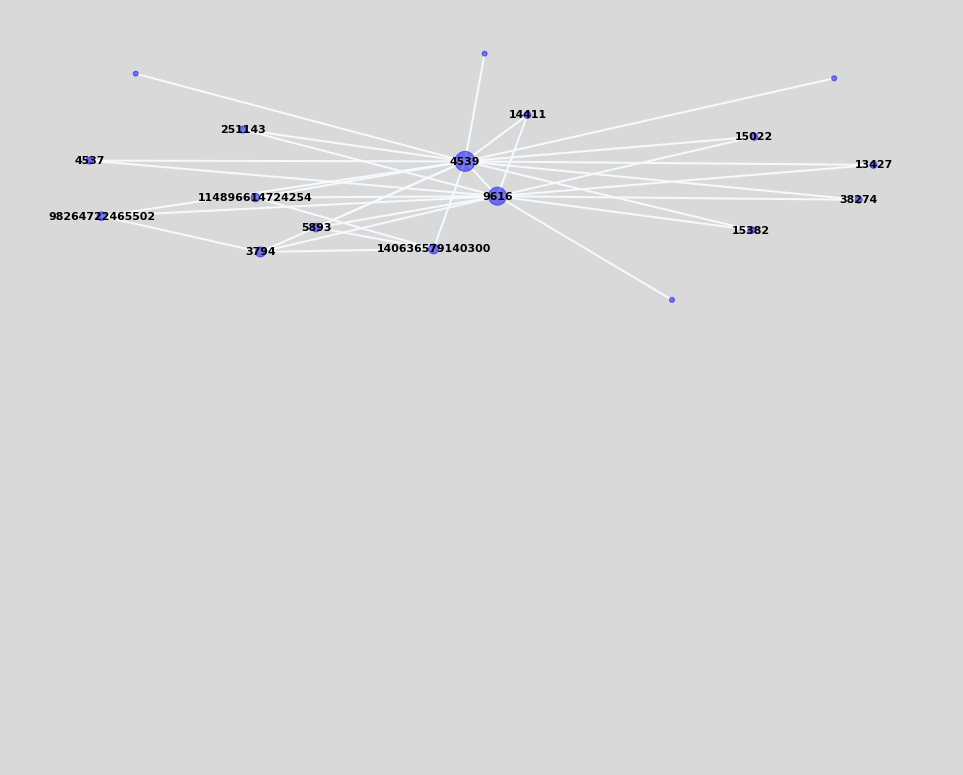

In [67]:
#__plot_graph(G2, threshold=2)

In [ ]:
# Filtrar por usuario y sus seguidores del grafo inicial
#df = pd.DataFrame(edges, columns=["source", "target"])
#node_list = list(df[df["target"] == "45396268"]["source"].values) + ["45396268"]
#final_nodes = df[df["target"] == "45396268"]["source"].values + ["45396268"]
#G2 = G.subgraph(node_list)

#final_nodes_df = pd.DataFrame(final_nodes, columns=['Id'])
#final_edges = nx.to_pandas_edgelist(G2)
#final_edges.to_csv("edges.csv")
#final_nodes_df.to_csv("nodes.csv")